In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_Data_df = pd.read_csv(city_data_to_load)
Ride_Data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(Ride_Data_df,City_Data_df, on="city")


# Display the data table for preview
merge_table.head()

Mergeddf = merge_table
Mergeddf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
Mergeddf11 = Mergeddf
Mergedgroup_Mergeddf11 = Mergeddf11.groupby(['city', 'type'])
print (Mergedgroup_Mergeddf11)
Mergedgroup_Mergeddf11.head()
Mergedgroup_Mergeddf11["city"].count()

MergedgrpSummarybase = pd.DataFrame({
                                    'Fare': Mergedgroup_Mergeddf11["fare"].sum(),
                                 'ride total' : Mergedgroup_Mergeddf11["ride_id"].count(), 
                                 'driver count' : Mergedgroup_Mergeddf11["driver_count"].sum(),
                                 'avg fare': Mergedgroup_Mergeddf11["fare"].mean(), 
                                 ##   'color' : Mergedgroup_Mergeddf["type"]
                                  })


MergedgrpSummarybase.head()

## Bubble Plot of Ride Sharing Data
Mergeddf1 = Mergeddf.loc[Mergeddf['type'] == 'Urban']
Mergedgroup_Mergeddf1 = Mergeddf1.groupby(['city', 'type'])
print (Mergedgroup_Mergeddf1)
Mergedgroup_Mergeddf1.head()
Mergedgroup_Mergeddf1["city"].count()

MergedgrpSummary = pd.DataFrame({
                                    'Fare': Mergedgroup_Mergeddf1["fare"].sum(),
                                 'ride total' : Mergedgroup_Mergeddf1["ride_id"].count(), 
                                 'driver count' : Mergedgroup_Mergeddf1["driver_count"].sum(),
                                 'avg fare': Mergedgroup_Mergeddf1["fare"].mean(), 
                                 ##   'color' : Mergedgroup_Mergeddf["type"]
                                  })


MergedgrpSummary.head()



,,Fare,ride total,driver count,avg fare
city,type,,,,
Amandaburgh,Urban,443.55,18,216,24.641667
Barajasview,Urban,557.31,22,572,25.332273
Carriemouth,Urban,764.49,27,1404,28.314444
Christopherfurt,Urban,661.55,27,1107,24.501852
Deanville,Urban,491.01,19,931,25.842632


In [3]:

MergeddfSuburban = Mergeddf.loc[Mergeddf['type'] == 'Suburban']
Mergedgroup_MergeddfSuburban = MergeddfSuburban.groupby(['city', 'type'])
print (Mergedgroup_MergeddfSuburban)
Mergedgroup_MergeddfSuburban.head()
Mergedgroup_MergeddfSuburban["city"].count()

MergedgrpSuburban = pd.DataFrame({
                                    'Fare': Mergedgroup_MergeddfSuburban["fare"].sum(),
                                 'ride total' : Mergedgroup_MergeddfSuburban["ride_id"].count(), 
                                 'driver count' : Mergedgroup_MergeddfSuburban["driver_count"].sum(),
                                 'avg fare': Mergedgroup_MergeddfSuburban["fare"].mean(), 
                                 ##   'color' : Mergedgroup_Mergeddf["type"]
                                  })
MergedgrpSuburban.head()



,,Fare,ride total,driver count,avg fare
city,type,,,,
Barronchester,Suburban,582.76,16,176,36.422500
Bethanyland,Suburban,593.21,18,396,32.956111
Brandonfort,Suburban,673.31,19,190,35.437368
Colemanland,Suburban,679.68,22,506,30.894545
Davidfurt,Suburban,543.93,17,391,31.995882


In [4]:
Mergeddfrural = Mergeddf.loc[Mergeddf['type'] == 'Rural']
Mergedgroup_Mergeddfrural = Mergeddfrural.groupby(['city', 'type'])
print (Mergedgroup_Mergeddfrural)
Mergedgroup_Mergeddfrural.head()
Mergedgroup_Mergeddfrural["city"].count()

Mergedgrprural = pd.DataFrame({
                                    'Fare': Mergedgroup_Mergeddfrural["fare"].sum(),
                                 'ride total' : Mergedgroup_Mergeddfrural["ride_id"].count(), 
                                 'driver count' : Mergedgroup_Mergeddfrural["driver_count"].sum(),
                                 'avg fare': Mergedgroup_Mergeddfrural["fare"].mean(), 
                                 ##   'color' : Mergedgroup_Mergeddf["type"]
                                  })
Mergedgrprural.head()

,,Fare,ride total,driver count,avg fare
city,type,,,,
Bradshawfurt,Rural,400.64,10,70,40.064000
Garzaport,Rural,72.37,3,21,24.123333
Harringtonfort,Rural,200.82,6,24,33.470000
Jessicaport,Rural,216.08,6,6,36.013333
Lake Jamie,Rural,206.15,6,24,34.358333


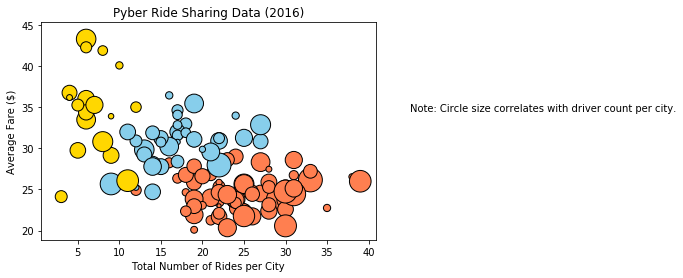

In [14]:
# Obtain the x and y coordinates for each of the three city types
urbanrides = Mergedgroup_Mergeddf1["ride_id"].count()
urbanfares = Mergedgroup_Mergeddf1["fare"].mean()
suburbanrides = Mergedgroup_MergeddfSuburban["ride_id"].count()
suburbanfares = Mergedgroup_MergeddfSuburban["fare"].mean()
ruralrides = Mergedgroup_Mergeddfrural["ride_id"].count()
ruralfares = Mergedgroup_Mergeddfrural["fare"].mean()

# Build the scatter plots for each city types
drivercount = MergedgrpSummary["driver count"]*.25

plt.scatter(urbanrides, urbanfares, marker="o", facecolors="coral", edgecolors="black", s=drivercount)
plt.scatter(suburbanrides, suburbanfares, marker="o", facecolors="skyblue", edgecolors="black", s=drivercount)
plt.scatter(ruralrides, ruralfares, marker="o", facecolors="gold", edgecolors="black", s=drivercount)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend

# Incorporate a text label regarding circle size
plt.text(45, 35,'Note: Circle size correlates with driver count per city.',verticalalignment='center_baseline')

# Save Figure
plt.savefig("../Images/PyberRideSharingData.png")


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

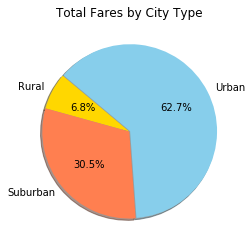

In [7]:
# Calculate Type Percents
Citygroup_Mergeddf = Mergeddf.groupby(['type'])
print (Citygroup_Mergeddf)
Citygroup_Mergeddf.head()
Citygroup_Mergeddf["type"].count()

CitySummary = pd.DataFrame({'Fares':Citygroup_Mergeddf["fare"].sum(),
                                'Riders': Citygroup_Mergeddf["ride_id"].count(),
                                 'Drivers' : Citygroup_Mergeddf["driver_count"].sum(),
                               'type %' : Citygroup_Mergeddf["type"].count()/Mergeddf["type"].count()
                           })
CitySummary.head()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [4327.93, 19356.33, 39854.38]
colors = ["gold", "coral", "skyblue"]
explode = (0, 0, 0.01)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")
# Save Figure
plt.savefig("../Images/totalfaresbycity.png")
plt.show()

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

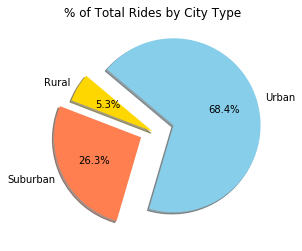

In [9]:
# Calculate Type Percents
Citygroup_Mergeddf = Mergeddf.groupby(['type'])
print (Citygroup_Mergeddf)
Citygroup_Mergeddf.head()
Citygroup_Mergeddf["type"].count()

CitySummary = pd.DataFrame({'Fares':Citygroup_Mergeddf["fare"].sum(),
                                'Riders': Citygroup_Mergeddf["ride_id"].count(),
                                 'Drivers' : Citygroup_Mergeddf["driver_count"].sum(),
                               'type %' : Citygroup_Mergeddf["type"].count()/Mergeddf["type"].count()
                           })
CitySummary.head()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [125, 625, 1625]
colors = ["gold", "coral", "skyblue"]
explode = (0, .15, 0.25)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/totalridesbycity.png")
plt.show()

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

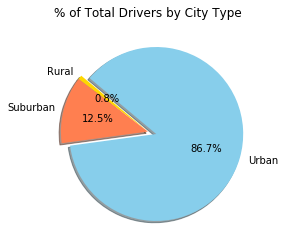

In [11]:
# Calculate Type Percents
Citygroup_Mergeddf = Mergeddf.groupby(['type'])
print (Citygroup_Mergeddf)
Citygroup_Mergeddf.head()
Citygroup_Mergeddf["type"].count()

CitySummary = pd.DataFrame({'Fares':Citygroup_Mergeddf["fare"].sum(),
                                'Riders': Citygroup_Mergeddf["ride_id"].count(),
                                 'Drivers' : Citygroup_Mergeddf["driver_count"].sum(),
                               'type %' : Citygroup_Mergeddf["type"].count()/Mergeddf["type"].count()
                           })
CitySummary.head()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [537, 8570, 59602]
colors = ["gold", "coral", "skyblue"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/totaldriversbycity.png")
plt.show()

In [12]:
# Show Figure
plt.show()